# Ion Molmer Sorenson sims

quantsim library courtesy of Chriss Knapp 2018

testing by Sam Hile 2018

In [1]:
import quantsim as qs
import qutip as qu
import numpy as np
from numpy import pi
from numpy import sqrt
import matplotlib.pyplot as plt

In [2]:
zeeSO = [-2*pi*19.2e3, -2*pi*30.05e3]       # Second order Zeeman shift for each ion
eta = 0.0042

trapfreq = 2*pi*461.4e3*2                  # motional mode frequency
#oms = 3*2*pi*461.4e3                # artificially large mode frequency to suppress off-resonant carrier excitation

Omgate = 2*pi*36.3e3                # Qubit Rabi frequency
Omrf = np.sqrt(2)*Omgate            # RF Rabi freq

d = 2*eta*Omgate                    # gate detuning
tgate = 2*pi/d                      # gate time

# calculate light shift on each ion, caused by off-resonant RF excitation
# from equation 6.13 in Joe Randall thesis
lshift1 = (3/4)*Omrf**2*zeeSO[0]/trapfreq**2       
lshift2 = (3/4)*Omrf**2*zeeSO[1]/trapfreq**2       

In [3]:
H = qs.Hamiltonian(nions = 2, nfock = 8, gradient = True, ZeeSO = zeeSO, eta1 = eta, trapfreq = trapfreq)

# dressing fields
H.addUwPlus(ion = 1, amp = 2*pi*20e3, det = 0)
H.addUwMinus(ion = 1, amp = 2*pi*20e3, det = 0)
H.addUwPlus(ion = 2, amp = 2*pi*21e3, det = 0)
H.addUwMinus(ion = 2, amp = 2*pi*21e3, det = 0)

# RF (gate) fields
H.addRfPlus(ion = 1, amp = Omrf, det = - trapfreq - d + lshift1, includeMinus=True)
H.addRfPlus(ion = 1, amp = Omrf, det = trapfreq + d + lshift1, includeMinus=True)
H.addRfPlus(ion = 2, amp = Omrf, det = - trapfreq - d + lshift2, includeMinus=True)
H.addRfPlus(ion = 2, amp = Omrf, det = trapfreq + d + lshift2, includeMinus=True)

In [4]:
psi0 = H.initial_state(['0p', '0p'], 0)     # initial state
times = np.linspace(0, 1.2*tgate, 5000)     # integrate to gate time +20%
sim = qs.TimeScan(H, times, psi0)

In [5]:
sim.run()

10.0%. Run time:  17.29s. Est. time left: 00:00:02:35
20.0%. Run time:  36.07s. Est. time left: 00:00:02:24
30.0%. Run time:  58.54s. Est. time left: 00:00:02:16
40.0%. Run time:  81.39s. Est. time left: 00:00:02:02
50.0%. Run time: 104.01s. Est. time left: 00:00:01:44
60.0%. Run time: 125.60s. Est. time left: 00:00:01:23
70.0%. Run time: 145.38s. Est. time left: 00:00:01:02
80.0%. Run time: 165.17s. Est. time left: 00:00:00:41
90.0%. Run time: 182.54s. Est. time left: 00:00:00:20
Total run time: 202.79s


In [6]:
p0p0p = sim.getPopulations(['0p', '0p'])
pDD = sim.getPopulations(['D', 'D'])
p0D = sim.getPopulations(['0p','D'])
pD0 = sim.getPopulations(['D','0p'])

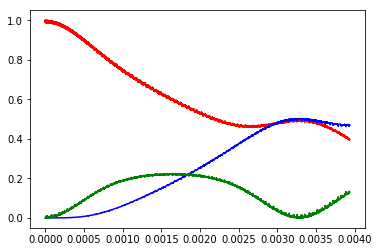

In [7]:
plt.plot(times, p0p0p, 'r')
plt.plot(times, pDD, 'b')
plt.plot(times, p0D + pD0, 'g')

plt.show()

In [8]:
H?

In [10]:
H.addClockTrans??